In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import tensorflow as tf
import numpy as np
from spatial_transformer import spatial_transformer_network
from utils import img2array

DIMS = (128, 128)
data_dir = './cat_images/'

# load 4 cat images
img1 = img2array(data_dir + 'cat1.jpg', DIMS, expand=True)#, view=True)
img2 = img2array(data_dir + 'cat2.jpg', DIMS, expand=True)
img3 = img2array(data_dir + 'cat3.jpg', DIMS, expand=True)
img4 = img2array(data_dir + 'cat4.jpg', DIMS, expand=True)

input_img = np.concatenate([img1, img2, img3, img4], axis=0)
B, H, W, C = input_img.shape
print("Input Img Shape: {}".format(input_img.shape))

Input Img Shape: (4, 128, 128, 3)


In [6]:
# generate a homography
import cv2
ch = 128
cw = 128
corner_pts = np.array([[0,0],[ch-1,0],[ch-1,cw-1],[0,cw-1]])
corner_pts_new = np.copy(corner_pts) - \
                 np.array([[10,10],[-10,10],[-10,-10],[10,-10]])

# note H map from corners new back to original corners

# calculate the difference in xy coordinate
# get actual homography
H = cv2.getPerspectiveTransform(np.fliplr(corner_pts.astype(np.float32)),
                            np.fliplr(corner_pts_new.astype(np.float32)))

theta = tf.convert_to_tensor(H.flatten())
theta = tf.expand_dims(theta, axis=0)
theta = tf.repeat(theta, repeats=input_img.shape[0], axis=0)
print(theta)

tf.Tensor(
[[  1.15748031   0.         -10.           0.           1.15748031
  -10.           0.           0.           1.        ]
 [  1.15748031   0.         -10.           0.           1.15748031
  -10.           0.           0.           1.        ]
 [  1.15748031   0.         -10.           0.           1.15748031
  -10.           0.           0.           1.        ]
 [  1.15748031   0.         -10.           0.           1.15748031
  -10.           0.           0.           1.        ]], shape=(4, 9), dtype=float64)


In [10]:
out = spatial_transformer_network(input_fmap=input_img,homography=theta)
print(out.shape)

(4, 128, 128, 3)


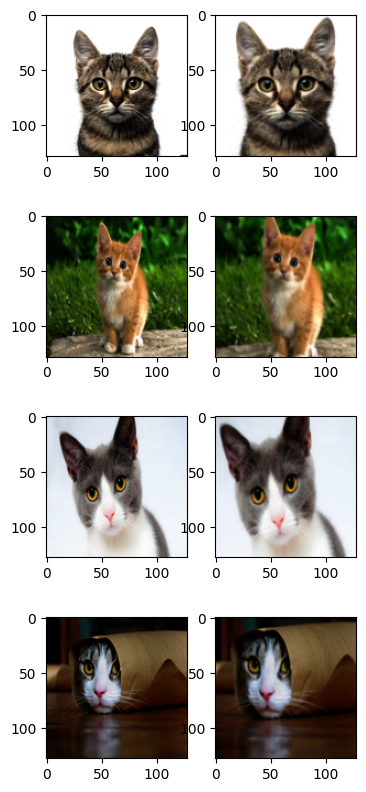

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,10))
for i in range(out.shape[0]):
    plt.subplot(4,2,2*i+1)
    plt.imshow(np.square(input_img[i,:,:,:]))
    plt.subplot(4,2,2*i+2)
    plt.imshow(tf.square(out[i,:,:,:]))
plt.show()